In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
sns.set_theme(style="whitegrid")

# Loading the data
df = pd.read_csv('Cleaned_datasets/Combined_CleanData_V2.csv')

# Univariate data analysis

In [2]:
# Checking the shape of the dataframe
df.shape

(3796, 28)

In [3]:
# Information about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_name        3796 non-null   object 
 1   Property_Type        3796 non-null   object 
 2   society              3795 non-null   object 
 3   sector               3796 non-null   object 
 4   price                3796 non-null   float64
 5   Price_Per_SQFT       3796 non-null   float64
 6   Area                 3796 non-null   float64
 7   areaWithType         3796 non-null   object 
 8   bedRoom              3796 non-null   float64
 9   bathroom             3796 non-null   float64
 10  balcony              3796 non-null   object 
 11  address              3787 non-null   object 
 12  floorNum             3796 non-null   int64  
 13  facing               2695 non-null   object 
 14  agePossession        3796 non-null   object 
 15  description          3796 non-null   o

In [4]:
# Checking first 3 rows of the dataframe
df.head(3)

,property_name,Property_Type,society,sector,price,Price_Per_SQFT,Area,areaWithType,bedRoom,bathroom,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Fridge,furnishing_type,luxury_score
0,2 BHK Flat in Krishna Colony,flat,maa bhagwati residency,sector 7,45.0,5000.0,90000.0,Carpet area: 900 (83.61 sq.m.),2.0,2.0,...,NaN,900.0,0,0,0,0,0,0,2,28.0
1,2 BHK Flat in Ashok Vihar,flat,apna enclave,sector 3,50.0,7692.0,65003.0,Carpet area: 650 (60.39 sq.m.),2.0,2.0,...,NaN,650.0,0,0,0,0,0,0,0,37.0
2,2 BHK Flat in Sohna,flat,tulsiani easy in homes,sector 1,40.0,6722.0,59506.0,Carpet area: 595 (55.28 sq.m.),2.0,2.0,...,NaN,595.0,0,0,0,0,0,0,2,36.0


- What is frequency count of flats and Independent houses in our dataframe ?
- Out of flats and houses which one have more price ?

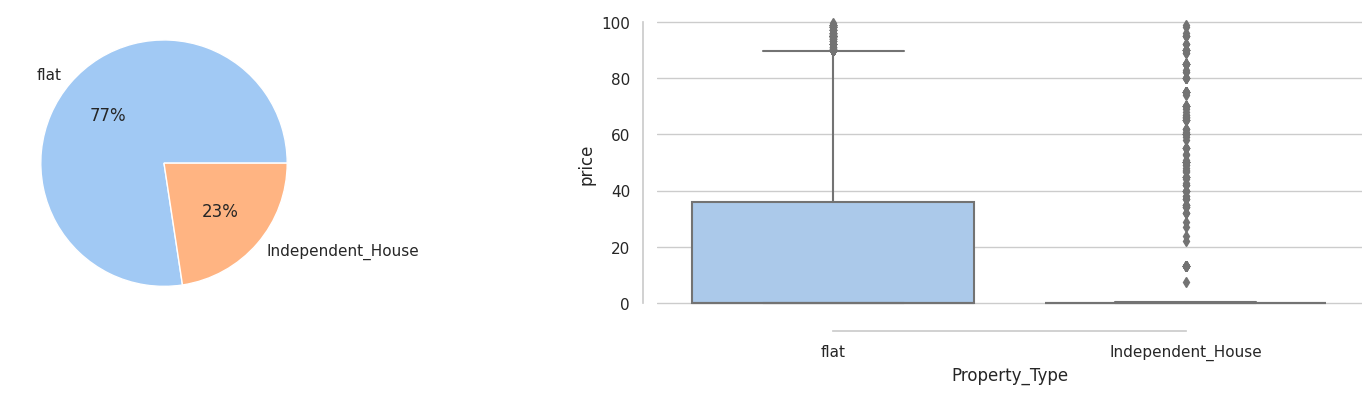

In [22]:
fig,ax = plt.subplots(1,2,figsize=(20,4))

colors = sns.color_palette('pastel')[0:7]
ax[0].pie(x = df['Property_Type'].value_counts().values, labels = df['Property_Type'].value_counts().index, colors = colors, autopct='%.0f%%')


sns.boxplot(x="Property_Type", y="price", palette=sns.color_palette("pastel"),ax = ax[1],data=df)
sns.despine(offset=10, trim=True)
pt.RainCloud()

plt.show()

In [26]:
len(df['sector'].unique())

94

<Axes: xlabel='sector', ylabel='price'>

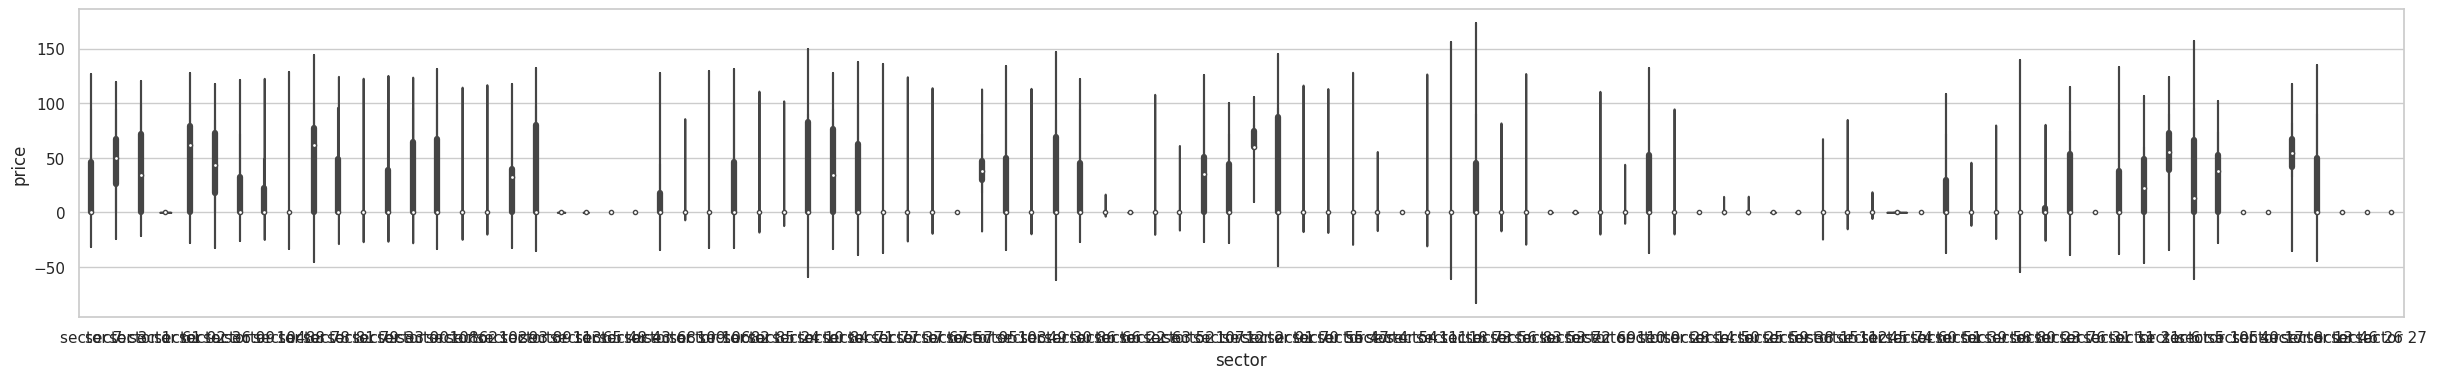

In [29]:
# Create the violin plot
fig,ax = plt.subplots(figsize=(30,4))
sns.violinplot(
    x = 'sector',
    y = 'price',
    showmeans=True,
    data=df
)
